In [1]:
import networkx as nx
G = nx.Graph()

In [3]:
G.add_node(1)

G.add_nodes_from([2, 3])

G.add_nodes_from([(4, {"color": "red"}), (5, {"color": "green"})])

H = nx.path_graph(10)
G.add_nodes_from(H)

G.add_node(H)

In [4]:
G.add_edge(1, 2)
e = (2, 3)
G.add_edge(*e)  # unpack edge tuple*

G.add_edges_from([(1, 2), (1, 3)])

G.add_edges_from(H.edges)

G.clear()

In [5]:
G.add_edges_from([(1, 2), (1, 3)])
G.add_node(1)
G.add_edge(1, 2)
G.add_node("spam")        # adds node "spam"
G.add_nodes_from("spam")  # adds 4 nodes: 's', 'p', 'a', 'm'
G.add_edge(3, 'm')

In [7]:
print(G.number_of_nodes())
print(G.number_of_edges())

8
3


In [8]:
DG = nx.DiGraph()
DG.add_edge(2, 1)   # adds the nodes in order 2, 1
DG.add_edge(1, 3)
DG.add_edge(2, 4)
DG.add_edge(1, 2)
assert list(DG.successors(2)) == [1, 4]
assert list(DG.edges) == [(2, 1), (2, 4), (1, 3), (1, 2)]

In [9]:
print(list(G.nodes))

print(list(G.edges))

print(G.adj[1])  # neighbors of node 1

print(G.degree[1])

print(G.edges([2,'m']))

print(G.degree([2,3]))

[1, 2, 3, 'spam', 's', 'p', 'a', 'm']
[(1, 2), (1, 3), (3, 'm')]
{2: {}, 3: {}}
2
[(2, 1), ('m', 3)]
[(2, 1), (3, 2)]


In [10]:
G.nodes["spam"]["color"] = "blue"
G.edges[(1, 2)]["weight"] = 10
G.edges(data=True)
G.nodes(data="color")

NodeDataView({1: None, 2: None, 3: None, 'spam': 'blue', 's': None, 'p': None, 'a': None, 'm': None}, data='color')

In [11]:
G.remove_node(2)
G.remove_nodes_from("spam")

print(list(G.nodes))

print(list(G.edges))
G.remove_edge(1, 3)
print(list(G.nodes))
print(list(G.edges))

[1, 3, 'spam']
[(1, 3)]
[1, 3, 'spam']
[]


In [12]:
G.add_edge(1, 2)
H = nx.DiGraph(G)  # create a DiGraph using the connections from G
print(list(H.edges()))

edgelist = [(0, 1), (1, 2), (2, 3)]
H = nx.Graph(edgelist)  # create a graph from an edge list
print(list(H.edges()))

adjacency_dict = {0: (1, 2), 1: (0, 2), 2: (0, 1)}
H = nx.Graph(adjacency_dict)  # create a Graph dict mapping nodes to nbrs
print(list(H.edges()))

[(1, 2), (2, 1)]
[(0, 1), (1, 2), (2, 3)]
[(0, 1), (0, 2), (1, 2)]


In [13]:
G = nx.Graph([(1, 2, {"color": "yellow"})])
print(G[1])

print(G[1][2])

print(G.edges[1, 2])

G.add_edge(1, 3)
G[1][3]['color'] = "blue"
G.edges[1, 2]['color'] = "red"
print(G.edges[1, 2])


FG = nx.Graph()
FG.add_weighted_edges_from([(1, 2, 0.125), (1, 3, 0.75), (2, 4, 1.2), (3, 4, 0.375)])
for n, nbrs in FG.adj.items():
   for nbr, eattr in nbrs.items():
       wt = eattr['weight']
       if wt < 0.5: print(f"({n}, {nbr}, {wt:.3})")

for (u, v, wt) in FG.edges.data('weight'):
    if wt < 0.5:
        print(f"({u}, {v}, {wt:.3})")

{2: {'color': 'yellow'}}
{'color': 'yellow'}
{'color': 'yellow'}
{'color': 'red'}
(1, 2, 0.125)
(2, 1, 0.125)
(3, 4, 0.375)
(4, 3, 0.375)
(1, 2, 0.125)
(3, 4, 0.375)


In [14]:
G = nx.Graph(day="Friday")
print(G.graph)

G.graph['day'] = "Monday"
print(G.graph)

G.add_node(1, time='5pm')
G.add_nodes_from([3], time='2pm')
print(G.nodes[1])

G.nodes[1]['room'] = 714
print(G.nodes.data())

{'day': 'Friday'}
{'day': 'Monday'}
{'time': '5pm'}
[(1, {'time': '5pm', 'room': 714}), (3, {'time': '2pm'})]


In [15]:
G.add_edge(1, 2, weight=4.7 )
G.add_edges_from([(3, 4), (4, 5)], color='red')
G.add_edges_from([(1, 2, {'color': 'blue'}), (2, 3, {'weight': 8})])
G[1][2]['weight'] = 4.7
G.edges[3, 4]['weight'] = 4.2

In [17]:
DG = nx.DiGraph()
DG.add_weighted_edges_from([(1, 2, 0.5), (3, 1, 0.75)])
DG.out_degree(1, weight='weight')

print(DG.degree(1, weight='weight'))

print(list(DG.successors(1)))

print(list(DG.neighbors(1)))

H = nx.Graph(G)

1.25
[2]
[2]


In [18]:
MG = nx.MultiGraph()
MG.add_weighted_edges_from([(1, 2, 0.5), (1, 2, 0.75), (2, 3, 0.5)])
print(dict(MG.degree(weight='weight')))

GG = nx.Graph()
for n, nbrs in MG.adjacency():
   for nbr, edict in nbrs.items():
       minvalue = min([d['weight'] for d in edict.values()])
       GG.add_edge(n, nbr, weight = minvalue)

nx.shortest_path(GG, 1, 3)

{1: 1.25, 2: 1.75, 3: 0.5}


[1, 2, 3]

In [19]:
K_5 = nx.complete_graph(5)
K_3_5 = nx.complete_bipartite_graph(3, 5)
barbell = nx.barbell_graph(10, 10)
lollipop = nx.lollipop_graph(10, 20)

er = nx.erdos_renyi_graph(100, 0.15)
ws = nx.watts_strogatz_graph(30, 3, 0.1)
ba = nx.barabasi_albert_graph(100, 5)
red = nx.random_lobster(100, 0.9, 0.9)

nx.write_gml(red, "path.to.file")
mygraph = nx.read_gml("path.to.file")

G = nx.Graph()
G.add_edges_from([(1, 2), (1, 3)])
G.add_node("spam")       # adds node "spam"
print(list(nx.connected_components(G)))

print(sorted(d for n, d in G.degree()))

print(nx.clustering(G))

sp = dict(nx.all_pairs_shortest_path(G))
print(sp[3])

[{1, 2, 3}, {'spam'}]
[0, 1, 1, 2]
{1: 0, 2: 0, 3: 0, 'spam': 0}
{3: [3], 1: [3, 1], 2: [3, 1, 2]}


In [20]:
import networkx as nx

eps = 1e-17

G = nx.DiGraph()
G.add_edge('A', 'B', weight=0.1)
G.add_edge('B', 'C', weight=0.1)
G.add_edge('C', 'D', weight=0.1)
G.add_edge('A', 'D', weight=0.3 + eps)

path = nx.shortest_path(G, 'A', 'D', weight='weight')
print(path)

0.1 + 0.1 + 0.1 > 0.3

['A', 'D']


True

In [24]:
# import networkx as nx
# G = nx.karate_club_graph()
# pr = nx.pagerank(G) 

# nx.config.backend_priority = ["fast_backend"]
# pr = nx.pagerank(G)


#pr = nx.pagerank(G, backend="fast_backend")

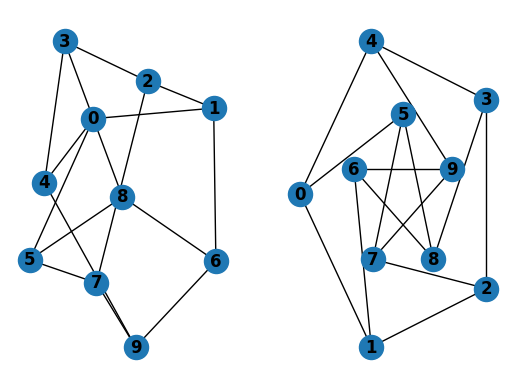

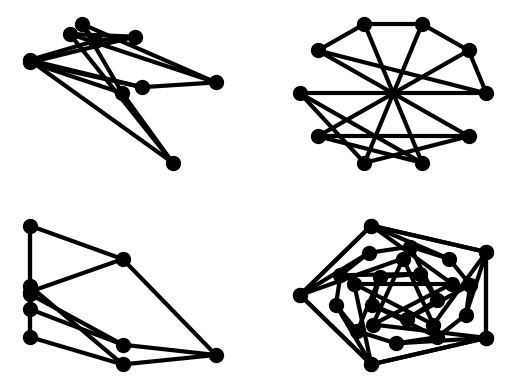

In [25]:
import matplotlib.pyplot as plt

G = nx.petersen_graph()
subax1 = plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold')
subax2 = plt.subplot(122)
nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')
plt.show()

options = {
    'node_color': 'black',
    'node_size': 100,
    'width': 3,
}
subax1 = plt.subplot(221)
nx.draw_random(G, **options)
subax2 = plt.subplot(222)
nx.draw_circular(G, **options)
subax3 = plt.subplot(223)
nx.draw_spectral(G, **options)
subax4 = plt.subplot(224)
nx.draw_shell(G, nlist=[range(5,10), range(5)], **options)

G = nx.dodecahedral_graph()
shells = [[2, 3, 4, 5, 6], [8, 1, 0, 19, 18, 17, 16, 15, 14, 7], [9, 10, 11, 12, 13]]
nx.draw_shell(G, nlist=shells, **options)